# COVID19DB PROJECT (www.covid19db.org): covid19 - confirmed and deaths


This notebook demonstrates how to connect to COVID19db Postgres database and how to generate data simple visualisaions.


In [5]:
import psycopg2
import pandas as pd
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Connect to covid19db.org
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19'
)
cur = conn.cursor()
cur.execute("SELECT * FROM epidemiology WHERE source='WRD_ECDC';")
df = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

## Confirmed and deaths in domain of time for selected countries

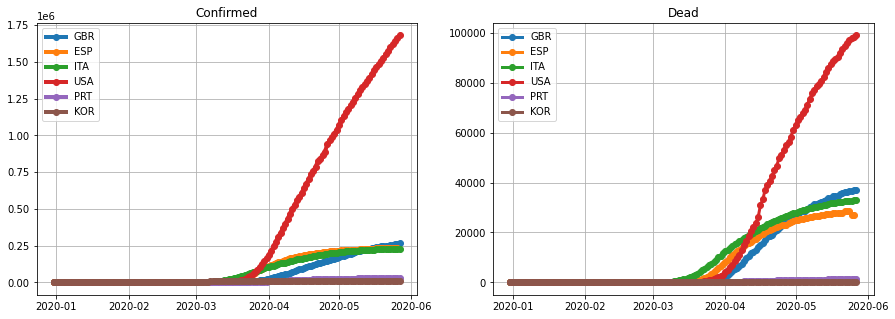

In [6]:
# Choose countries 
my_countries = ['GBR','ESP', 'ITA', 'USA', 'PRT', 'KOR']

df_who = []
for countrycode in my_countries:
    df_who.append(df[(df.countrycode==countrycode) & df['adm_area_1'].isnull()].sort_values(by='date'))
    

## Figure 1: Confirmed and Dead
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for j in range(len(my_countries)):
    plt.plot(df_who[j].date, df_who[j].confirmed, '-o', linewidth=4.0, label=my_countries[j])
plt.title('Confirmed')
plt.grid()
plt.legend();

plt.subplot(1,2,2)
for j in range(len(my_countries)):
    plt.plot(df_who[j].date, df_who[j].dead, '-o', linewidth=3.0, label=my_countries[j])
plt.title('Dead')
plt.grid()
plt.legend();

## Total deaths (starting with 10 deaths) and Deaths per day (starting with 10 deaths)

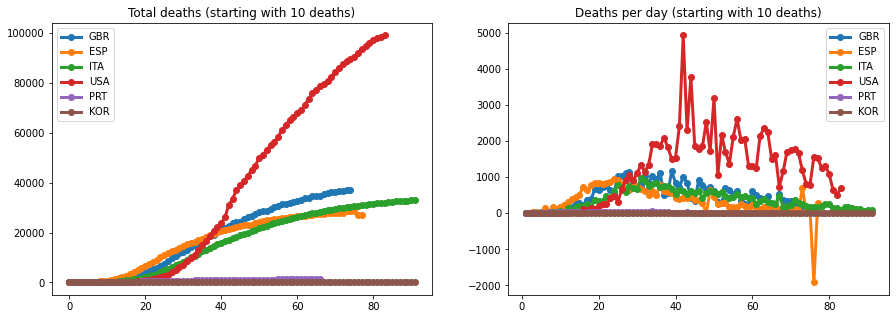

In [7]:
## Figure 2: Total deaths and Deaths per day
plt.figure(figsize=(15,5))
start_with_deaths = 10;
plt.subplot(1,2,1)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths],'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Total deaths (starting with 10 deaths)');

plt.subplot(1,2,2)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths].diff(),'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Deaths per day (starting with 10 deaths)');

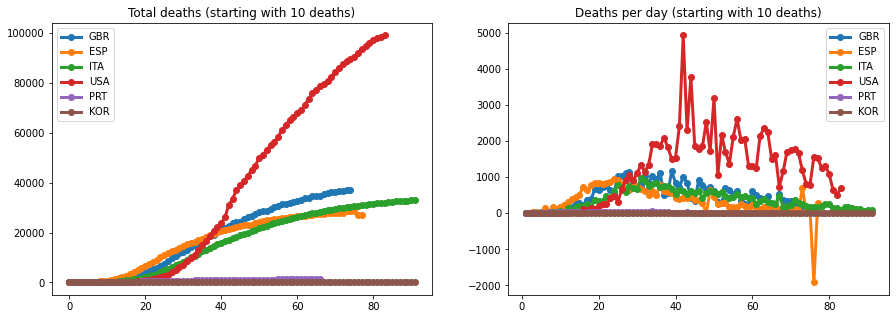

In [9]:
## Figure 2: Total deaths and Deaths per day
plt.figure(figsize=(15,5))
start_with_deaths = 10;
plt.subplot(1,2,1)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths],'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Total deaths (starting with 10 deaths)');

plt.subplot(1,2,2)
for j in range(len(my_countries)):
    plt.plot(range(len(df_who[j].dead[df_who[j].dead>=start_with_deaths])),df_who[j].dead[df_who[j].dead>=start_with_deaths].diff(),'-o', linewidth=3.0,label=my_countries[j])
plt.legend();
plt.title('Deaths per day (starting with 10 deaths)');